# IDEAS LIST
##Main Ideas
* Focus of competition is on pass coverage
* What is a successful pass coverage?
    * Incompletion
    * Offense loses yards
    * Offense does not gain a first down
    * Sack, interception, offensive penalty
       
* Who is most successful against pass?
    * Defenders?
    * Defensive alignments?
    * Coverages?
    * Formation pairings for defense to avoid?
    
* How can we predict a penalty?
    * What does a penalty cost in terms of yardage, EPA?

* Calculate speed of pass by distance it travels over time
     * How is speed of thrown pass related to pass defense?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2021/week4.csv
/kaggle/input/nfl-big-data-bowl-2021/week6.csv
/kaggle/input/nfl-big-data-bowl-2021/week5.csv
/kaggle/input/nfl-big-data-bowl-2021/week17.csv
/kaggle/input/nfl-big-data-bowl-2021/week9.csv
/kaggle/input/nfl-big-data-bowl-2021/week2.csv
/kaggle/input/nfl-big-data-bowl-2021/week11.csv
/kaggle/input/nfl-big-data-bowl-2021/week1.csv
/kaggle/input/nfl-big-data-bowl-2021/week3.csv
/kaggle/input/nfl-big-data-bowl-2021/games.csv
/kaggle/input/nfl-big-data-bowl-2021/week13.csv
/kaggle/input/nfl-big-data-bowl-2021/week10.csv
/kaggle/input/nfl-big-data-bowl-2021/week16.csv
/kaggle/input/nfl-big-data-bowl-2021/players.csv
/kaggle/input/nfl-big-data-bowl-2021/week15.csv
/kaggle/input/nfl-big-data-bowl-2021/week8.csv
/kaggle/input/nfl-big-data-bowl-2021/plays.csv
/kaggle/input/nfl-big-data-bowl-2021/week12.csv
/kaggle/input/nfl-big-data-bowl-2021/week14.csv
/kaggle/input/nfl-big-data-bowl-2021/week7.csv


In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import altair as alt
import glob

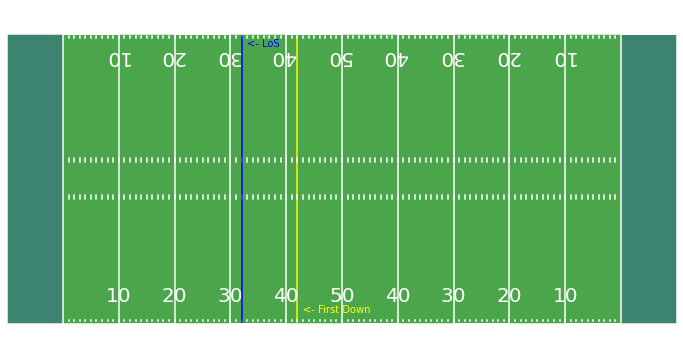

In [14]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='LoS',
                          firstdown_line=False,
                          firstdown_line_number=50,
                          firstdown_name='First Down',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='green',alpha=.7 ,zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 4, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,
                     color='white',
                     zorder=1)
            plt.text(x-.5, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,
                     color='white', 
                     zorder=1, rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0.3, 53], color='blue',zorder=2)
        plt.text(hl + 1, 51, '<- {}'.format(highlighted_name),color='blue',zorder=2)
    
    if firstdown_line:
        f1 = firstdown_line_number +10
        plt.plot([f1,f1],[0.3,53], color='yellow',zorder=1)
        plt.text(f1 + 1, 2, '<- {}'.format(firstdown_name), color='yellow',zorder=2)
    
    return fig, ax

create_football_field(highlight_line=True,highlight_line_number=32,firstdown_line=True,firstdown_line_number=42)
plt.show()

In [40]:
# read in all the files
files = glob.glob('/kaggle/input/nfl-big-data-bowl-2021/week*.csv')

li=[]
for f in files:
    df = pd.read_csv(f)
    li.append(df)
    
weeks = pd.concat(li)

weeks.reset_index(drop=True,inplace=True)

In [44]:
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/plays.csv')
games = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/games.csv')
players = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/players.csv')

In [ ]:
# find commons keys across all data frames
## weeks -> nflId(playerid), gameId, playId
## plays -> gameId, playId
## games -> gameId
## players -> nflId(playerid)

In [49]:
for i in [weeks,plays,games,players]:
    print(list(i.columns))

['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId', 'displayName', 'jerseyNumber', 'position', 'frameId', 'team', 'gameId', 'playId', 'playDirection', 'route']
['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber', 'offenseFormation', 'personnelO', 'defendersInTheBox', 'numberOfPassRushers', 'personnelD', 'typeDropback', 'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock', 'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers', 'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI']
['gameId', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr', 'week']
['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position', 'displayName']


In [ ]:
weeksplays = weeks.merge(plays,on=['gameId','playId'])

In [ ]:
weeksplays.merge(games, on='')

In [20]:
filt = (week1['gameId'] == 2018090600) & (week1['playId'] == 75)

falc_play75 = week1[filt]

In [27]:
falc_play75[falc_play75['position'] == 'Football']

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route


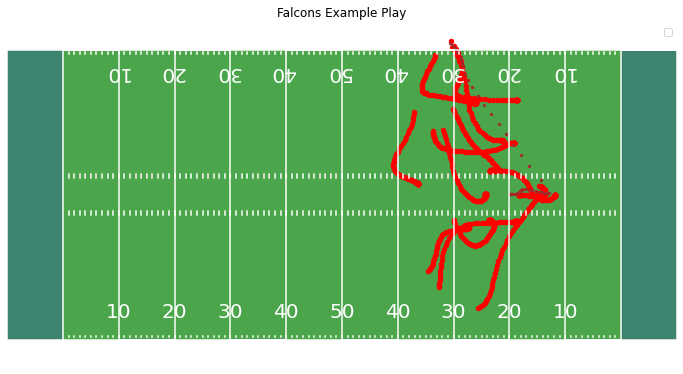

In [32]:
fig, ax = create_football_field()

falc_play75[falc_play75['displayName'] != 'Football'].plot(x='x',y='y',kind='scatter',ax=ax,color='red',s=20,legend='Falcons')

falc_play75[falc_play75['displayName'] == 'Football'].plot(x='x',y='y',kind='scatter',ax=ax,color='brown',s=5,legend='Falcons',zorder=1)

plt.title('Falcons Example Play')
plt.legend()
plt.show()